In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn import decomposition
from sklearn.decomposition import PCA
import plotly.express as px

In [48]:
df = pd.read_csv("Mall_Customers.csv")

In [49]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# There are no missing values so there is no need for me to delete / replace any points

In [50]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Dropping features

In [51]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

# Standardize the data

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scatter Plot for X

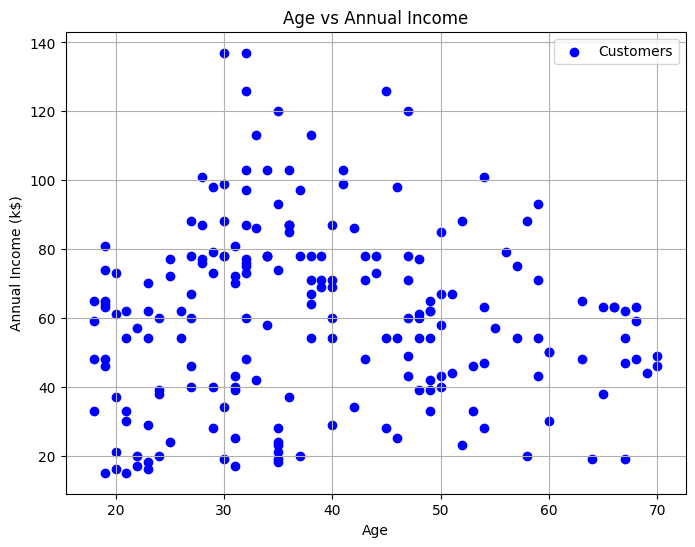

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], color='blue', label='Customers')

plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.grid(True)
plt.show()

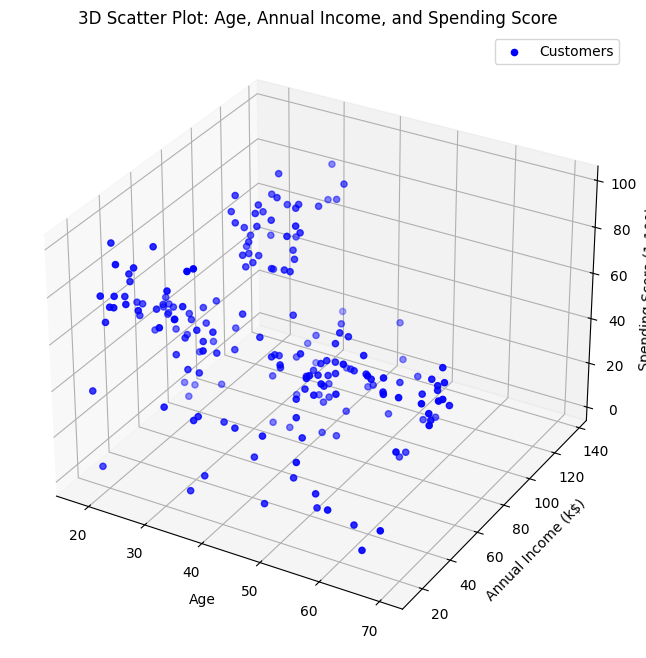

In [54]:
# 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], color='blue', label='Customers')

# Labels and title
ax.set_title("3D Scatter Plot: Age, Annual Income, and Spending Score")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.legend()

plt.show()


# Find the best number of clusters for the K mean model

### In this case the best number of clusters for the K mean is 4. I chose k=4 as the optimal number of clusters because it represents the point where the inertia decreases rapidly and then begins to level off. Adding more clusters after 4 didn’t really improve the results much, so it seemed unnecessary. Therefore, k=4 gives me the best balance between simplicity and good clustering.

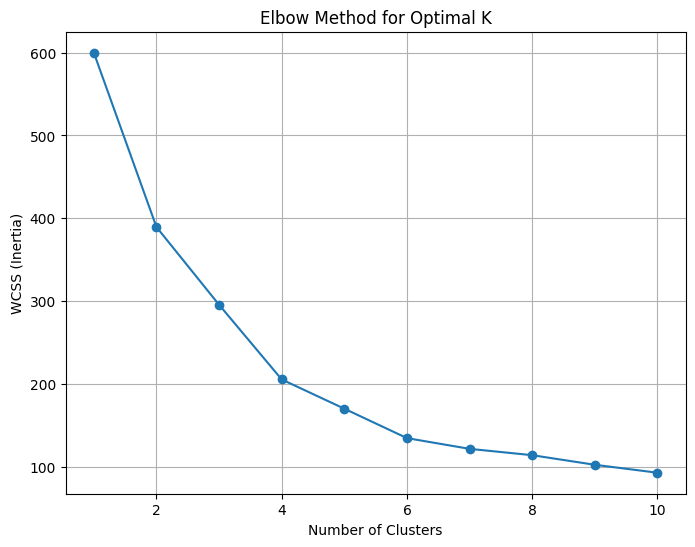

WCSS values for 1 to 10 clusters: [600.0, 389.3861889564372, 295.4562449213556, 205.22514747675916, 169.89149793438582, 134.3527747740149, 121.3893502250287, 113.72723000071335, 102.13623844329251, 92.55027231838784]


In [55]:
wcss = []  # List to store the inertia values (WCSS)

# Test different values of k (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init="auto", max_iter=5000, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

print("WCSS values for 1 to 10 clusters:", wcss)



# I fit KMeans with k=4 clusters 

In [56]:
kmeans = KMeans(n_clusters=4, n_init="auto", max_iter=5000, random_state=42)
kmeans.fit(X_scaled)


,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,5000
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


# Plot the scatter plot of X where each cluster has a different color.



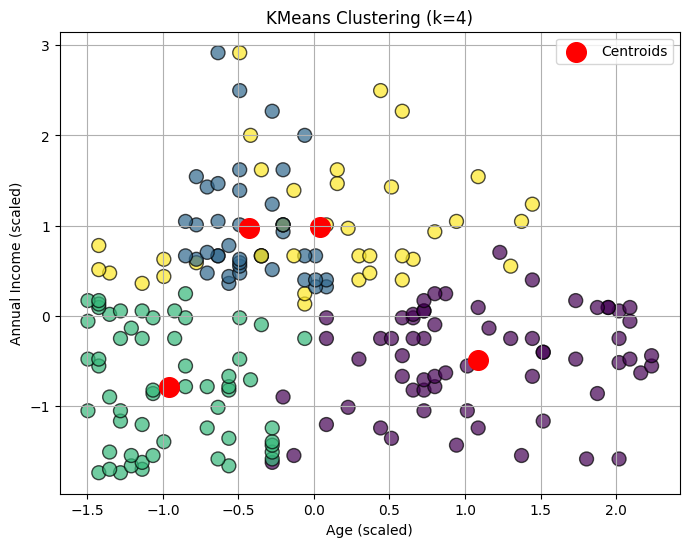

In [57]:

plt.figure(figsize=(8, 6))

# Scatter plot, coloring by cluster labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=100, edgecolors='k', alpha=0.7)

# Add cluster centers to the plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label="Centroids")

plt.title("KMeans Clustering (k=4)")
plt.xlabel("Age (scaled)")
plt.ylabel("Annual Income (scaled)")
plt.legend()
plt.grid(True)
plt.show()

# Printing the inertia for the best number of clusters

In [58]:
print(f"Inertia for k=4 clusters: {kmeans.inertia_}")

Inertia for k=4 clusters: 205.22514747675916
